# Machine Learning Project: Cat vs Dog Classification
- This is a machine learning project from FreeCodeCamp using Deep Learning for image classification between cat and dog. 
- The link for this project: https://www.freecodecamp.org/learn/machine-learning-with-python/machine-learning-with-python-projects/cat-and-dog-image-classifier

In [1]:
# import libralies
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil

## Import the data
- The dataset used in this project can be downloaded at: https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

In [2]:
# download the dataset
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
# unzip the file
!unzip cats_and_dogs.zip
# main path
PATH = 'cats_and_dogs'
# base directory for training set, validation set, and test set
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# create subdirectory for test set, then move all files there
os.mkdir(os.path.join(test_dir, 'test'))
for filename in [f for f in os.listdir(test_dir) if os.path.isfile(os.path.join(test_dir, f))]:
    shutil.move(os.path.join(test_dir, filename), os.path.join(test_dir, 'test', filename))

total_train = sum([len(files) for r, d, files in os.walk(train_dir)]) - 1
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)]) - 1
total_test = sum([len(files) for r, d, files in os.walk(test_dir)]) - 1

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

## Data Preprocessing
- Rescaling
- Data Augmentation

In [3]:
# variables for pre-processing and training.
batch_size = 128
epochs = 30
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [4]:
# function for plot images with the corresponding probabilities
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

In [5]:
# use the ImageDataGenerator to preprocess the data
# for training set --> rescaling the data to range(0,1)
#                  --> performing data augmentations
train_image_generator = ImageDataGenerator(rescale=1/255,
                                           rotation_range=40,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True,
                                           fill_mode='nearest')
# flow the data from the base directory
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

# sample the first batch of training images
sample_training_images, _ = next(train_data_gen)

Found 2000 images belonging to 2 classes.


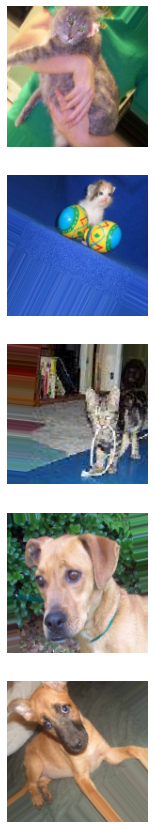

In [6]:
# plot the first 5 images
plotImages(sample_training_images[:5])

Found 2000 images belonging to 2 classes.


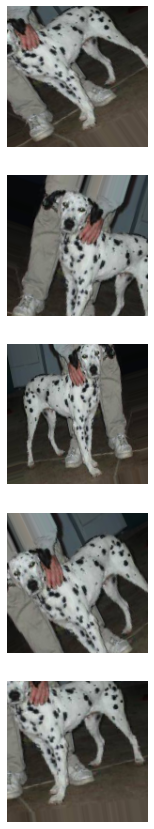

In [7]:
# use the ImageDataGenerator to preprocess the data
# for training set --> rescaling the data to range(0,1)
#                  --> performing data augmentations
train_image_generator = ImageDataGenerator(rescale=1/255,
                                           rotation_range=40,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True,
                                           fill_mode='nearest')
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
# flow the data from the base directory
# Display the data augmentation
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [8]:
# use the ImageDataGenerator to preprocess the data
# for training set --> rescaling the data to range(0,1)
#                  --> performing data augmentations
# for validation set and test set --> rescaling the data to range(0,1)
train_image_generator = ImageDataGenerator(rescale=1/255,
                                           rotation_range=40,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True,
                                           fill_mode='nearest')
validation_image_generator = ImageDataGenerator(rescale=1/255)
test_image_generator =  ImageDataGenerator(rescale=1/255)

# flow the data from each base directory
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(batch_size=total_test,
                                                         directory=test_dir,
                                                         target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                         shuffle=False,
                                                         class_mode=None)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


## Model Fitting
- CNN model with
    - 1st Layer: Convolution layer with 32 filters with 3x3 stride, ReLU activation function
    - 2nd Layer: 2x2 Max Pooling Layer
    - 3rd Layer: Convolution layer with 64 filters with 3x3 stride, ReLU activation function
    - 4th Layer: 2x2 Max Pooling Layer
    - 5th Layer: Convolution layer with 128 filters with 3x3 stride, ReLU activation function
    - 6th Layer: 2x2 Max Pooling Layer
    - 7th Layer: Flatten to Fully-connected Layer
    - 8th Layer: Dense layer with 512 neurons, ReLU activation function with 40% Dropout
    - 9th Layer: Output layer with 1 neuron, sigmoid activation function

In [9]:
# Create the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# set the optimizer, loss, and metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [10]:
# train the model
history = model.fit(train_data_gen,
                    epochs=epochs,
                    verbose=1,
                    validation_data=val_data_gen)

Epoch 1/30
16/16 [==============================] - 112s 7s/step - loss: 0.6949 - accuracy: 0.4895 - val_loss: 0.6925 - val_accuracy: 0.5600
Epoch 2/30
16/16 [==============================] - 108s 7s/step - loss: 0.6922 - accuracy: 0.5285 - val_loss: 0.6898 - val_accuracy: 0.6090
Epoch 3/30
16/16 [==============================] - 110s 7s/step - loss: 0.6831 - accuracy: 0.6010 - val_loss: 0.7424 - val_accuracy: 0.5020
Epoch 4/30
16/16 [==============================] - 107s 7s/step - loss: 0.6962 - accuracy: 0.5230 - val_loss: 0.6886 - val_accuracy: 0.5580
Epoch 5/30
16/16 [==============================] - 106s 7s/step - loss: 0.6914 - accuracy: 0.5090 - val_loss: 0.6852 - val_accuracy: 0.5640
Epoch 6/30
16/16 [==============================] - 107s 7s/step - loss: 0.6863 - accuracy: 0.5520 - val_loss: 0.6816 - val_accuracy: 0.5870
Epoch 7/30
16/16 [==============================] - 105s 7s/step - loss: 0.6754 - accuracy: 0.5995 - val_loss: 0.6583 - val_accuracy: 0.5950
Epoch 8/30
16

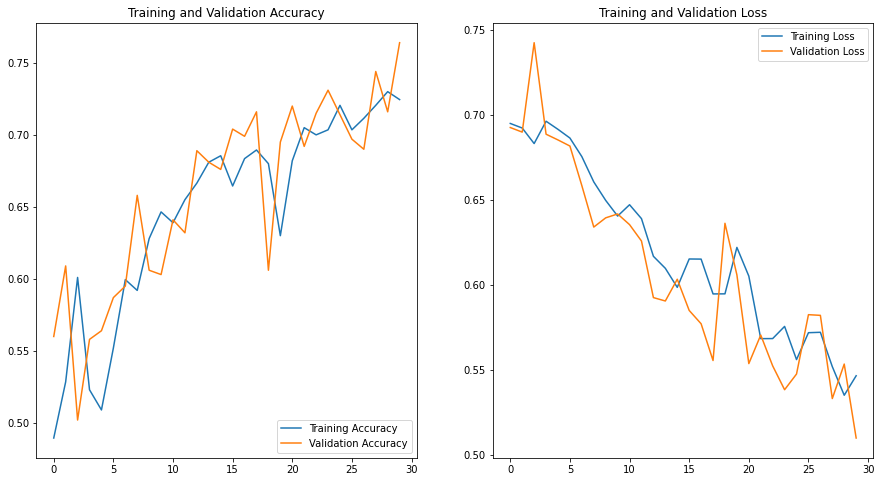

In [11]:
# plot the accuracy and loss during the training session
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Model Evaluation
- test the accuracy of the model using test set

In [12]:
# test the model using the test set
probabilities = model.predict(test_data_gen, verbose=0).flatten().tolist()

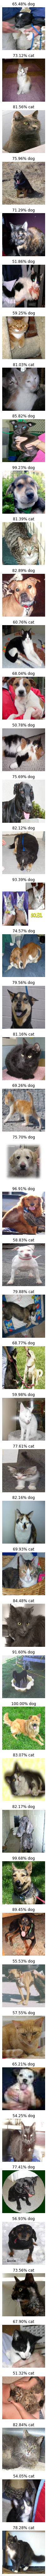

In [13]:
# plot all test images with the probabilities
test_images = next(test_data_gen)
plotImages(test_images, probabilities)

In [14]:
test_labels = [1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
               0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
               0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
               0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
               1, 0, 1, 1, 0, 0, 0, 0, 0, 0]

correct_prediction = 0
for probability, test_label in zip(probabilities, test_labels):
    if round(probability) == test_label:
        correct_prediction +=1

percentage_identified = (correct_prediction / len(test_labels)) * 100
print('This model has {:.2f}% accuracy on test set.'.format(percentage_identified))

This model has 76.00% accuracy on test set.
